#### DATA SET
* This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
* Predict house price.

#### LIBRARIES
* The Numpy library is a python library written to simplify scientific computing. It is useful for linear algebra, Fourier transform and much more.
* Pandas is built on top of the NumPy package. This is generally used in data processing and cleaning.(read to csv or text file, to create DataFrame)
* Matplotlib is an visualization library.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
data=pd.read_csv("kc_house_data.csv")
#to see top 5 rows of a data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# to see information of our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


From the above information, ın data set:
   * There are 21 columns and 21613 entries.
   * Type of features are float and integer.
   * Type of data columns variables are object.
   * There aren't non-null values.

In [4]:
#to see statistical values of data set
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


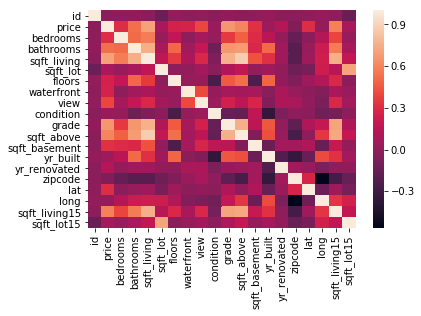

In [6]:
# visualizing correlation matrix to understand the correlation between variables
corr=data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,fmt=".2g")


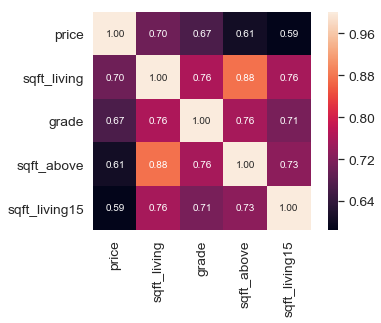

In [7]:
# Top 5 Heatmap
k = 5 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,sqft_living
2,grade
3,sqft_above
4,sqft_living15


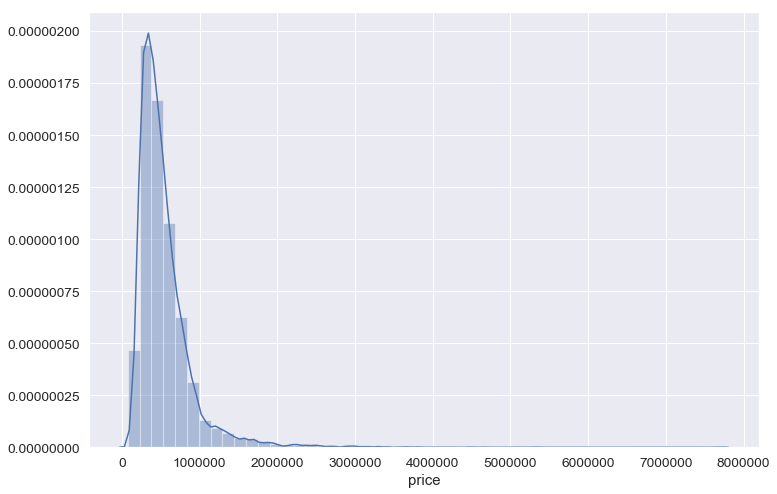

In [9]:
plt.figure(figsize=(12,8))
X = data.drop(['date','price'], axis=1)
y = data['price']
sns.distplot(y)
plt.show()

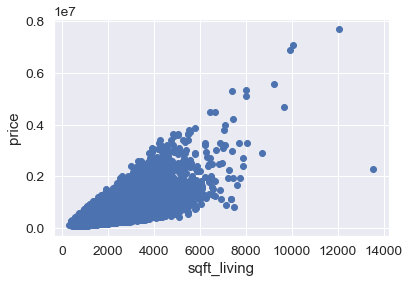

In [10]:
# We choose two features that are related to each other and observe that.
x=data.sqft_living
y=data.price
plt.scatter(x,y)
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.show()

#### LINEAR REGRESSION
* Linear regression is one of the supervised model.
* Linear regression is used for finding linear relationship between target and one or more features. 
   * Simple linear regression  : One is independent variable and other is dependent variable. 
   * Multiple linear regression: One is independent variable and others are dependent variable.
              


In [11]:
#train-test split
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [12]:
#imported and fitted Linear Regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

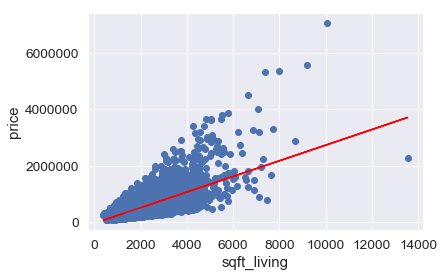

In [14]:
# visulazed linear regression
plt.scatter(x_test,y_test)

plt.plot(x_test,lr.predict(x_test), color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.show()

In [15]:
#estimated r2 for linear regression.
from sklearn.metrics import r2_score
y_head=lr.predict(x_test)
r2_LR=r2_score(y_test,y_head)
print("r_score for linear regression ",r2_LR)

r_score for linear regression  0.4876476297710668


In [16]:
#Multiple Linear Regression with most correlated features

X1=pd.concat([data["sqft_living"],data["grade"],data["sqft_above"],data["sqft_living15"]],axis=1) 
X_train, X_test, Y_train, Y_test =train_test_split(X1,y,test_size=0.33,random_state=42)
lr2=LinearRegression()
lr2.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# to calculated r2 
Y_head2=lr2.predict(X_test)
r2_MLR=r2_score(Y_test,Y_head2)
print("r2_score for multiple linear regression with 4 features",r2_MLR)

r2_score for multiple linear regression with 4 features 0.5349608405707039


In [18]:
# multiple linear regression with all independent variables
X1_train, X1_test, Y1_train, Y1_test =train_test_split(X,y,test_size=0.33,random_state=42)
lr3=LinearRegression()
lr3.fit(X1_train,Y1_train)
# calculating r2 
Y1_head2=lr3.predict(X1_test)
r2_MLR2=r2_score(Y1_test,Y1_head2)
print("r2_score for multiple linear regression",r2_MLR2)

r2_score for multiple linear regression 0.6966648165617149


#### DECISION TREE REGRESSION
* A decision tree is a supervised machine learning model.
* Used to predict a target by learning decision rules from features. 


In [19]:
#Decision Tree Regression
X2_train, X2_test, Y2_train, Y2_test= train_test_split(X,y,test_size=0.33,random_state=42)
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X2_train,Y2_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
#to calculated r2 .
Y_head3=dtree.predict(X2_test)
r2_DTR=r2_score(Y2_test,Y_head3)
print("r2_score for decision tree regression",r2_DTR)

r2_score for decision tree regression 0.7443779299227128


#### RANDOM FOREST REGRESSION
* A Random Forest is an ensemble learning technique.
* This method performs regression tasks with the use of multiple decision trees.

In [21]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf=  RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X2_train,Y2_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
#to calculated r2.
Y_head4=rf.predict(X2_test)
r2_RFR=r2_score(Y2_test,Y_head4)
print("r2_score for random forest regression",r2_RFR)

r2_score for random forest regression 0.8526904801813557


In [23]:
r2_score_dic={ "Regression models": ["Linear Regression","Multiple Linear Regression with 5 features",
                                      "Multiple Linear Regression","Decision Tree Regression","Random Forest Regression"],
               "r2_score": [r2_LR,r2_MLR,r2_MLR2,r2_DTR,r2_RFR]
    
}

r2_score=pd.DataFrame(r2_score_dic)
r2_score

,Regression models,r2_score
0,Linear Regression,0.487648
1,Multiple Linear Regression with 5 features,0.534961
2,Multiple Linear Regression,0.696665
3,Decision Tree Regression,0.744378
4,Random Forest Regression,0.852690


##### CONCLUSION
We compared regression models that are applied to our data set by examining r_square scores. This investigates shows that the best prediction model for this data set is the Random Forest Regression model.